In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.plots import *

In [4]:
from src.url_csv import df_join

In [5]:
df1 = pd.read_csv('../data/ht_match.csv')
df2 = pd.read_csv('../data/ht_match_ind.csv')
df_eda = df_join(df1,df2)

In [14]:
df_eda.describe()

,match_id,win,totalGold,level,xp,totalKills,totalDeaths,level_ups
count,1.986800e+04,19868.000000,19868.000000,19868.000000,19868.000000,19868.000000,19868.000000,19868.000000
mean,4.366149e+09,0.500000,165629.088383,354.599456,172945.631921,18.403463,18.403463,82.330381
std,1.950352e+04,0.500013,87254.611299,159.927044,100361.984035,10.109816,10.109816,17.766560
min,4.366060e+09,0.000000,5000.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,4.366137e+09,0.000000,99932.500000,239.000000,98389.750000,12.000000,12.000000,72.000000
50%,4.366151e+09,0.500000,152224.000000,334.000000,155233.000000,18.000000,18.000000,84.000000
75%,4.366164e+09,1.000000,214588.000000,456.000000,229392.500000,24.000000,24.000000,94.000000
max,4.366177e+09,1.000000,710374.000000,1136.000000,741459.000000,80.000000,80.000000,134.000000


In [6]:
df_eda

,teams,match_id,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,totalGold,level,xp,totalKills,totalDeaths,level_ups
0,blue,4366059781,1,True,True,True,False,False,True,205374,420,207036,22,18,92
1,red,4366059781,0,False,False,False,False,True,False,191351,415,203735,18,22,90
2,blue,4366059798,0,False,False,False,False,True,False,86179,210,86018,12,16,68
3,red,4366059798,1,True,True,False,False,False,True,96787,210,84440,16,12,68
4,blue,4366059814,1,False,True,True,False,True,True,135641,292,129768,24,12,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,red,4366176693,0,False,False,False,False,False,True,187784,426,213015,14,24,88
19958,blue,4366176715,0,False,False,False,False,False,False,164501,354,164319,16,24,82
19959,red,4366176715,1,True,True,True,False,True,True,177722,378,180736,24,16,90
19960,blue,4366176718,0,True,False,False,False,True,True,44479,109,33567,6,8,48


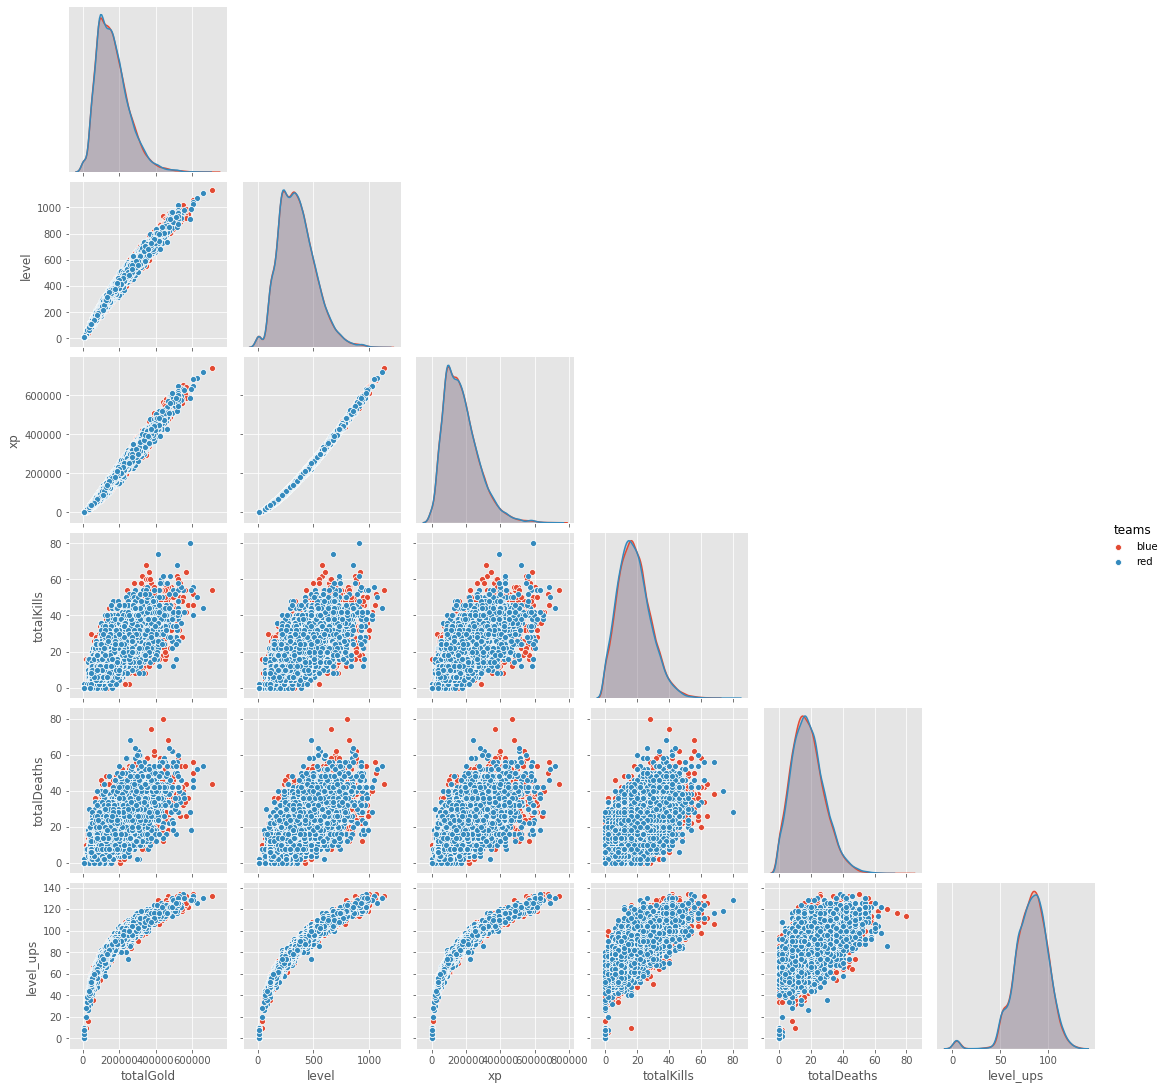

In [12]:
general_correlation_plot(df_eda.drop(columns=['match_id','win','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald']))